In [23]:
import xradar as xd
import xradar
import xarray as xr
from open_radar_data import DATASETS
import matplotlib.pyplot as plt
import cmweather
import numpy as np

In [24]:
filepath = DATASETS.fetch('cfrad.20211011_201733.023_to_20211011_201745.299_DOW8_RHI.nc')
dt = xd.io.open_cfradial1_datatree(filepath)
ds = dt['sweep_0'].ds.copy()
ds['longitude'] = ds['longitude'].mean('time').values
ds['latitude'] = ds['latitude'].mean('time').values
ds['azimuth'] = np.median(ds['azimuth'].values)
ds['altitude'] = np.median(ds['altitude'].values)
ds = ds.xradar.georeference()

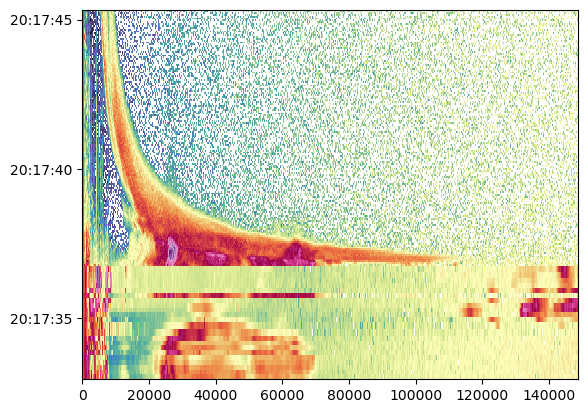

In [25]:
fig, ax = plt.subplots()
ax.pcolormesh(ds.range, ds.time, ds.DBZHC, cmap='ChaseSpectral')

(0.0, 20000.0)

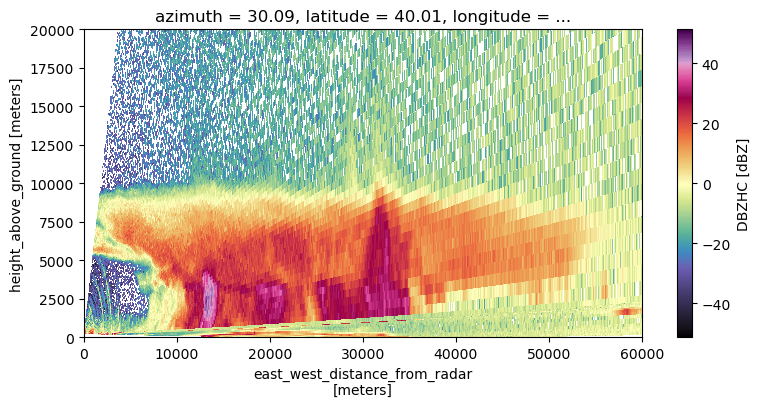

In [30]:
fig, ax = plt.subplots(figsize=(9, 4))
ds.DBZHC.plot(x='x', y='z', cmap='ChaseSpectral')
ax.set_xlim(0, 60*1e3)
ax.set_ylim(0, 20*1e3)